<a href="https://colab.research.google.com/github/madhavamk/computational-data-science/blob/master/MiniProjects/M8_NB_MiniProject_2_EDA_Timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Mini-Project: Exploratory Data Analysis - Timeseries

## Problem Statement

Perform Exploratory Data Analysis (EDA) of Retail Sales time series data using visualizations and statistical methods.

## Learning Objectives

At the end of the mini-project, you will be able to :

* perform Exploratory data analysis (EDA) of the time series
* perform Time series behaviour analysis in qualitative and quantitative terms
* summarize the findings based on the EDA

## Dataset

The dataset is a French retail company quarterly sales data that has been made available from  Prof. Rob Hyndman's ["Forecasting Methods & Applications"](https://robjhyndman.com/forecasting/) book. There are 24 entries, from 2012-03-31 to 2017-12-31 (Quarterly sales values).

## Introduction

Exploratory data analysis of time series data starts with data visualization.

- Are there consistent patterns?
- Is there a significant trend?
- Is seasonality important?
- Is there evidence of the presence of business cycles?
- Are there any outliers in the data that need to be explained by those with expert knowledge?
- How strong are the relationships among the variables available for analysis?

Various tools have been developed to help with these analyses.

## Grading = 10 Points

In [1]:
#@title Download Dataset
!wget -qq https://cdn.iisc.talentsprint.com/CDS/Datasets/ts_frenchretail.csv

### Importing libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8-white')
%matplotlib inline
import scipy
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import month_plot, seasonal_plot, quarter_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy import signal
import warnings
warnings.filterwarnings("ignore")
np.random.seed(42)

### Import the Data

In [29]:
# Read dataset with 'Date' as index
# YOUR CODE HERE
df = pd.read_csv('ts_frenchretail.csv', index_col='Date', parse_dates=True)

## Exploratory Data Analysis

### **Preprocessing** (1 point)

#### Divide the sales by 1000

Sales numbers are in thousands, so divide by 1000 to make it easier to work with numbers

In [30]:
# YOUR CODE HERE
df['Sales'] = df['Sales']/1000

#### Check for missing values     

In [31]:
# YOUR CODE HERE
df.isnull().sum()

,0
Sales,0


### **Visualization**

#### Visualize the time series (2012 to 2017) (1 point)

In [32]:
df.head()

,Sales
Date,
2012-03-31,362.0
2012-06-30,385.0
2012-09-30,432.0
2012-12-31,341.0
2013-03-31,382.0


<Axes: xlabel='Date'>

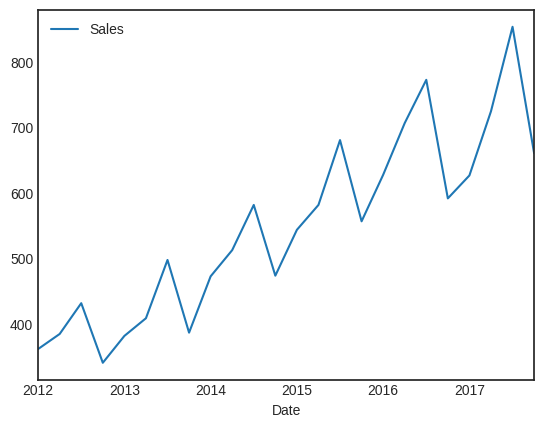

In [33]:
# YOUR CODE HERE
df.plot()

#### Visualize the data year-wise and quarter-wise (2 points)

- Box plot to see distribution of sales in each year
- Create year-wise subplots to visualize the quarterly Sales per year
- Compute Percentage growth each year

Make a report of your observations.

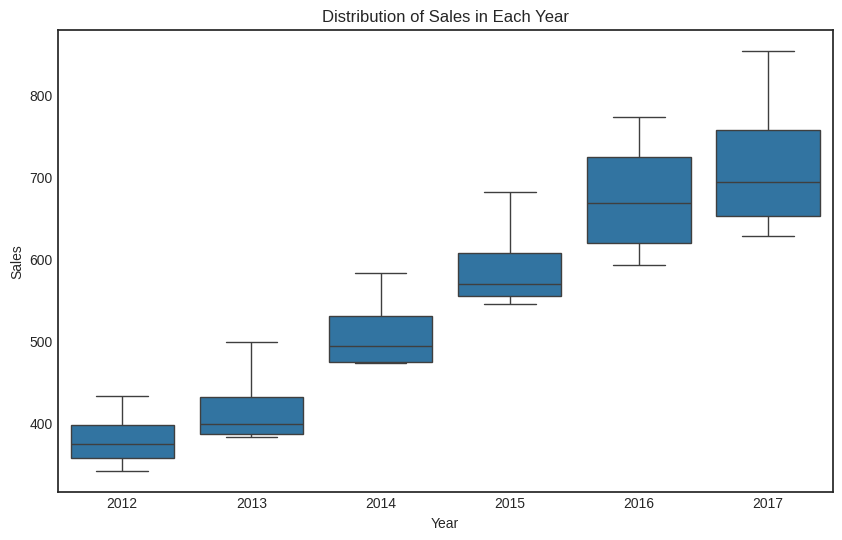

In [34]:
# Box plot to see distribution of sales in each year
# YOUR CODE HERE
plt.figure(figsize=(10,6))
sns.boxplot(x=df.index.year, y=df['Sales'])
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Distribution of Sales in Each Year')
plt.show()

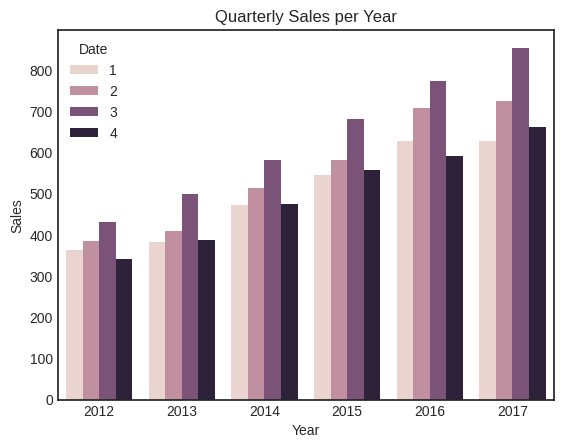

In [35]:
# Create year-wise subplots to visualize the quarterly Sales per year
# YOUR CODE HERE
sns.barplot(x=df.index.year, y=df['Sales'], hue=df.index.quarter)
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Quarterly Sales per Year')
plt.show()

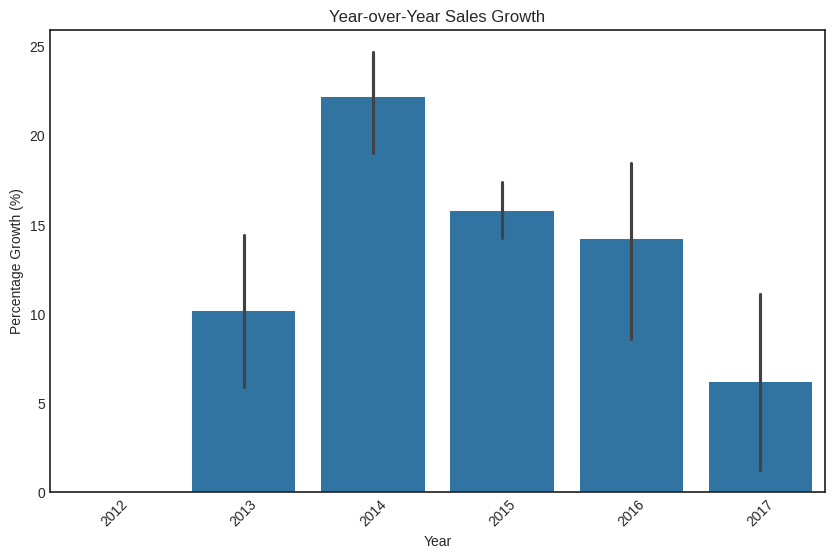

In [36]:
# Percentage growth each year
# YOUR CODE HERE
# Calculate percentage change from previous year
df['PercentageGrowth'] = df['Sales'].pct_change(periods=4) * 100

# periods=4 for year-over-year change (since data is quarterly)
plt.figure(figsize=(10, 6))
sns.barplot(x=df.index.year, y=df['PercentageGrowth'])
plt.xlabel("Year")
plt.ylabel("Percentage Growth (%)")
plt.title("Year-over-Year Sales Growth")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

#### Visualize the distribution of the Sales (0.5 point)

While normally distributed data is not a requirement for forecasting and doesn't necessarily improve point forecast accuracy, it can help stablize the variance and narrow the prediction interval.

Report your observations.

Hint: `sns.distplot()`

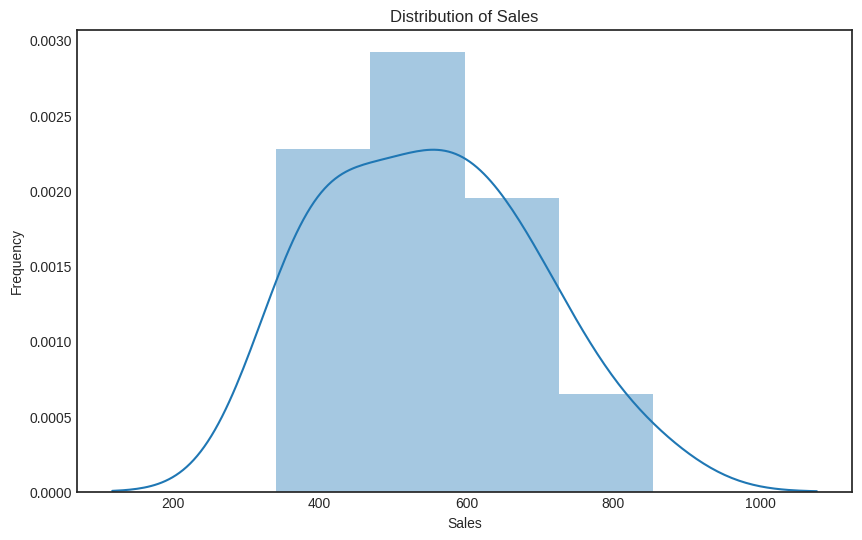

In [37]:
# YOUR CODE HERE
plt.figure(figsize=(10,6))
sns.distplot(df['Sales'])
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales')
plt.show()

## It looks like a normal distribution

#### Visualize Quarterly trends (1 point)

Create quarterly subplots to visualize the data in each quarter across all years

Hint: statsmodels' `quarter_plot()` method

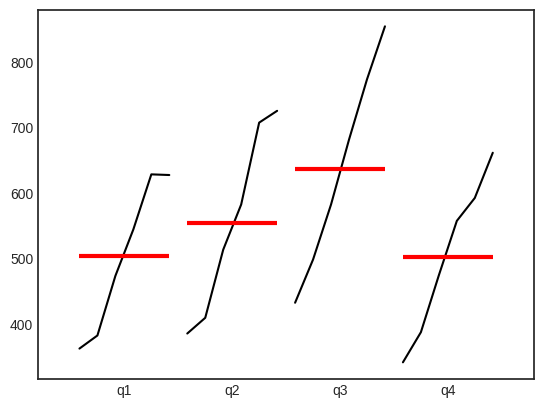

In [38]:
# YOUR CODE HERE
quarter_plot(df['Sales'])
plt.show()

#### Visualize the distribution of Sales in each year within a single plot (1 point)

- Do the distribution peaks shift to the right from 2012 to 2017? What does this indicate?
- Is there a change in the width of the distributions from 2012 to 2017? What does it signify?

Hint: `sns.distplot(hist=False)`

<Figure size 1000x600 with 0 Axes>

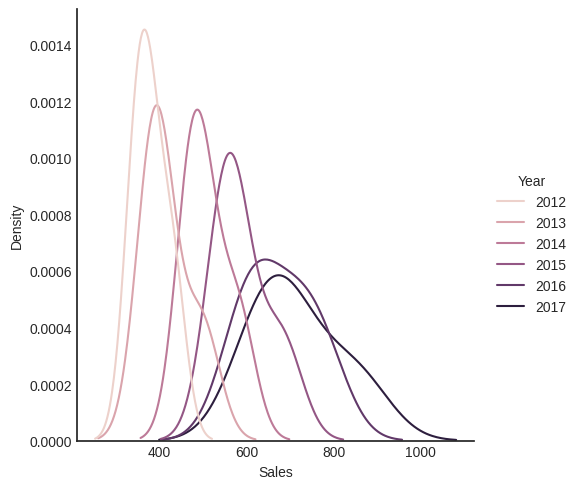

In [49]:
# Distribution plot of each year
# YOUR CODE HERE
plt.figure(figsize=(10,6))
df['Year'] = df.index.year
sns.displot(data=df, x="Sales", hue="Year",kind="kde")
plt.show()

## Yes, distribution peak shifts to right. It indicates sales values are higher over time
## Yes, distribution width increases. It indicates high variance. So uncertainty with the sales.

---



#### Visualize the quarterly sales for each year using a stacked bar plot (1 point)

<Axes: xlabel='Year'>

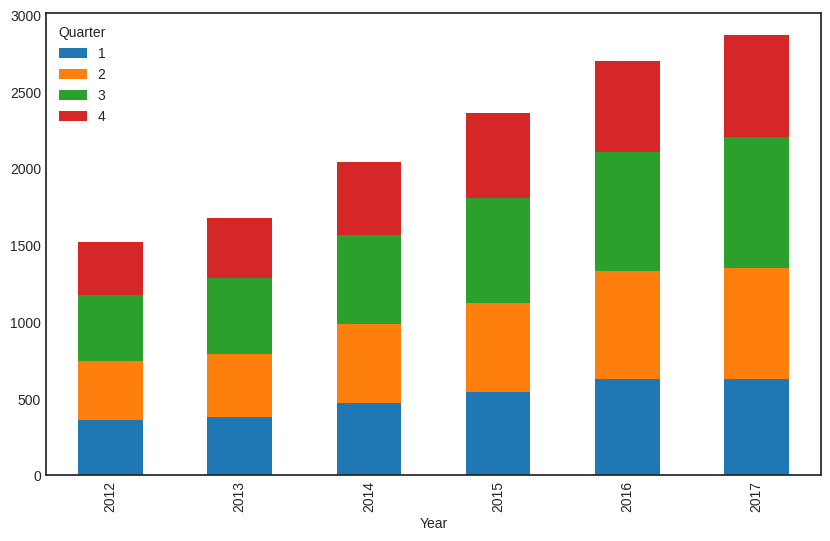

In [50]:
# Plot stacked bar plot
# YOUR CODE HERE
df['Quarter'] = df.index.quarter
quarterly_sales = df.groupby(['Year', 'Quarter'])['Sales'].sum().unstack()
quarterly_sales.plot(kind='bar', stacked=True, figsize=(10, 6))

#### Check if the time series data is stationary (1 point)

Hint:

For the series to be stationary, it must have:
 - constant mean
 - constant variance
 - constant covariance (uncorrelated)

Visualize if the mean is constant

Hint: [Rolling mean](https://pandas.pydata.org/docs/reference/api/pandas.core.window.rolling.Rolling.mean.html)

Text(0, 0.5, 'Sales')

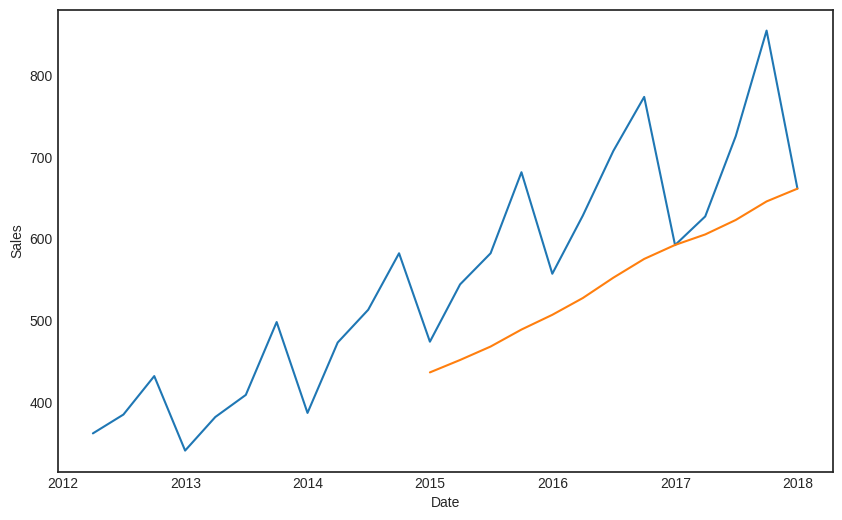

In [52]:
# Visualize Rolling mean
# YOUR CODE HERE
rolling_mean = df['Sales'].rolling(window=12).mean()
plt.figure(figsize=(10,6))
plt.plot(df.index, df['Sales'], label='Original')
plt.plot(df.index, rolling_mean, label='Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Sales')

Visualize if the variance is constant

Hint: [Rolling standard deviation](https://pandas.pydata.org/docs/reference/api/pandas.core.window.rolling.Rolling.std.html)

Text(0, 0.5, 'Sales')

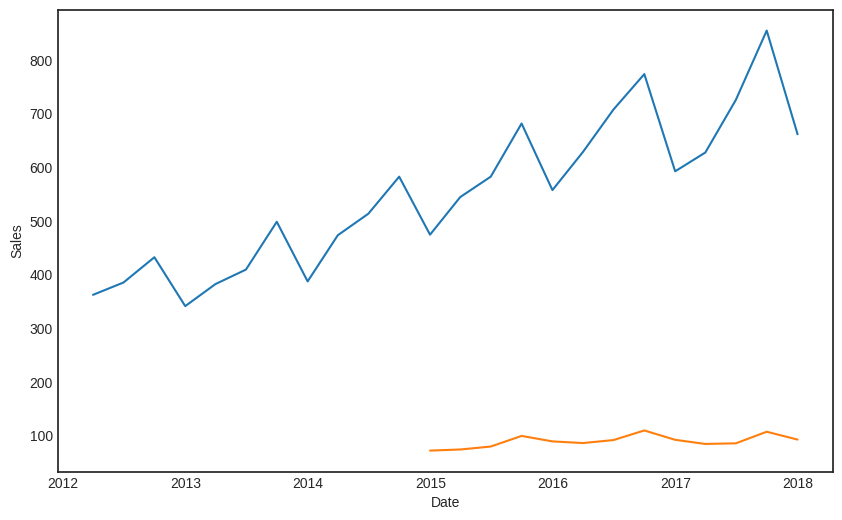

In [53]:
# Rolling standard deviation
# YOUR CODE HERE
rolling_std = df['Sales'].rolling(window=12).std()
plt.figure(figsize=(10,6))
plt.plot(df.index, df['Sales'], label='Original')
plt.plot(df.index, rolling_std, label='Rolling Std')
plt.xlabel('Date')
plt.ylabel('Sales')

Based on the observations report whether the series is stationary or not.

## Since rolling mean is not horizontal, the time series does not seam to be stationary

#### Visualize the patterns in time series - trend, seasonality, residuals (1 point)

Hint: See Module 8 - AST2 EDA > Patterns in a time series

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

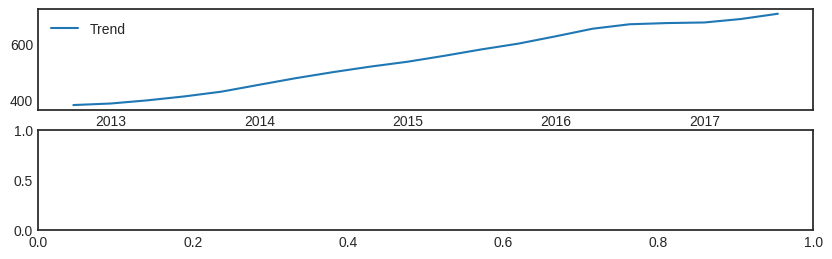

In [54]:
# Applying seasonal decompose
# YOUR CODE HERE
decomposition = seasonal_decompose(df['Sales'], model='additive')

# Plotting trend, seasonality
# YOUR CODE HERE
plt.figure(figsize=(10,6))
plt.subplot(411)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(412)
plt

Report if there are any observable patterns in terms of trend, seasonality , or cyclic behavior.

## Its showing increasing trend with seasonal dip.

### **Detrending**

####  Detrend the time series (0.5 point)

Detrending a time series is to remove the trend component from a time series.

Hint:
- Subtract the line of best fit `scipy.signal.detrend()`

In [55]:
# YOUR CODE HERE
detrended_sales = scipy.signal.detrend(df['Sales'])

### **Lag Plots** (Optional)

#### Visualize the Lag plots

A Lag plot is a scatter plot of a time series against a lag of itself. It is normally used to check for autocorrelation. If there is any pattern existing in the series, the series is autocorrelated. If there is no such pattern, the series is likely to be random white noise.

For reference, see Module 8 - AST2 > Lag Plots

Hint: `pandas.plotting.lag_plot()`

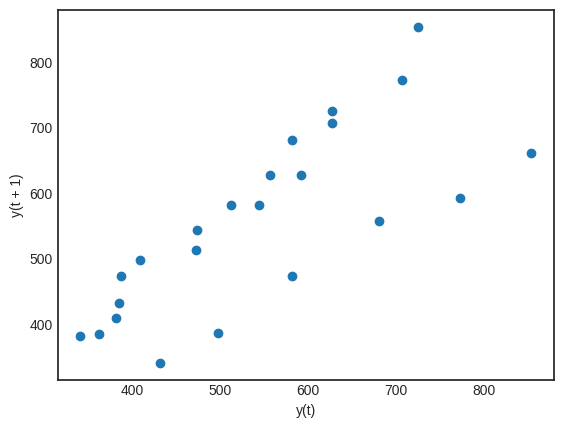

In [56]:
# Visualize lag plots
# YOUR CODE HERE
lag_plot(df['Sales'])
plt.show()

### Report Analysis

- Give the summary about this time series

## Summary
The French retail time series data, representing quarterly sales from 2012 to 2017, exhibits the following key characteristics:

**Trend**: The data shows a clear increasing trend, indicating a general upward movement in sales over time. The business is likely experiencing growth, with higher sales values in later years compared to earlier years.

**Seasonality**: There is a prominent quarterly seasonality, with sales peaking in the third and fourth quarters of each year, likely driven by holiday seasons and consumer spending patterns. Sales are generally lower in the first and second quarters.

**Distribution**: The distribution of sales is positively skewed or right-skewed, with the peak shifting to the right over time. This indicates a tendency towards higher sales values and the presence of some high-value transactions.

**Variability**: The distribution width is increasing, suggesting greater variability or fluctuation in sales performance. This might be attributed to changing customer behavior, market dynamics, or product diversification.

**Stationarity**: Based on the visual analysis of the rolling mean, rolling standard deviation and the decomposition components, the time series is likely non-stationary. This is due to the presence of both trend and seasonality.

**Patterns**: There is an observable pattern of increasing sales with quarterly peaks and troughs that is consistent over the years